## Lecture 1: The Geometry of Linear Equations

Follow along with Strang's [first lecture](http://ocw.mit.edu/courses/mathematics/18-06-linear-algebra-spring-2010/video-lectures/lecture-1-the-geometry-of-linear-equations).

These notebooks are not a textbook. They're not meant to serve as a replacement for a textbook. Think of them more as a lab notebook kept while watching Strang's execellent linear algebra lectures while translating the concepts to Python. You will probably be confused if you don't watch the lectures as well.

Why linear algebra? Let's hear from the source himself:

>I personally believe that many more people need linear algebra than calculus. Isaac
>Newton might not agree! But he isn’t teaching mathematics in the 21st century (and
>maybe he wasn’t a great teacher, but we will give him the benefit of the doubt).>Certainly the laws of physics are well expressed by differential equations. Newton needed
>calculus—quite right. But the scope of science and engineering and management (and
>life) is now so much wider, and linear algebra has moved into a central place.

- Gilbert Strang, *Linear Algebra and Its Applications*, 4th edition, p. iv.

The primary packages that we'll be using to learn linear algebra are [NumPy](http://www.numpy.org/) and [SciPy](http://www.scipy.org/). For some things, we'll also use [SymPy](http://www.sympy.org). 

NumPy is a fast numerical computing package that, among other things, specializes in vector and matrix operations. The fundamental data structure in NumPy is called an *array*. One dimensional arrays are vectors while multi-dimensional arrays are matrices. In addition, we'll be using [Matplotlib](http://matplotlib.org/) when we need to create visualizations. Matplotlib isn't the most user friendly package (by a country mile), but it plays nicely with NumPy arrays. 

If you've ever had experience using Matlab, NumPy will feel fairly natural to you (however, if you're reading an introduction to linear algebra, you most likely haven't used Matlab all that much!

NumPu provides approximate answers, however, as answers may be irrational. For many of the matrix operations we'll be performing (especially early on), we want exact answers. SymPy can provide us with those.

NumPy and SciPy can be an absolute pain to build from scratch, so I recommend using [Anaconda](https://store.continuum.io/cshop/anaconda/), a free Python distribution which comes with all of the packages pre-built for you.

All of the notebooks have been written using Python 3.4, but most things should work fine in Python 2.X as well.

**NOTE**: Some of the slides will be quite verbose with text and formulas and very little actual Python code. This is just the nature of how efficient NumPy is at performing these operations. I'm not trying to reconstruct NumPy from first principles. Rather, I'm trying to take notes on Strang's lectures and show his work while showing how that work can be reproduced with ease using NumPy.

Finally, a bit about indexing. Strang's lectures treat matrices as *1-indexed*, which means that rows and columns start counting at 1. The first item in the first row of a matrix is identifed as [1, 1]. Python, on the other hand, is a *0-indexed* language, and this includes NumPy. This means that the same item in the same matrix will be identified as [0, 0]. While this is confusing at first, it's a common thing to encounter, so it's worth getting used to. Other statistical languges such as R and Julia are 1-indexed as well. 

We can use Python's slicing syntax to index rows and columns.

In [5]:
from __future__ import division, print_function

from IPython.display import YouTubeVideo

import sympy as sym

In [3]:
YouTubeVideo('ZK3O402wf1c') 

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

We begin by talking a bit about solving systems of linear equations, the most basic case being *n* equations with *n* unknowns. 

We'll start by representing these equations in matrices and then solving the equations, first using the rows, then using the columns, then using matrix operations.

\begin{array}{rcl} 2x - y & = & 0 \\ -x + 2y & = & 3 \end{array}

These equations can be represented in matrix form first with a *coefficient matrix*, which we'll call **A**. 

We'll create a two-dimensional NumPy array. You could also represent this in pure Python using a list of lists. 

The coefficient matrix **A** looks like this:

<center>
    $\pmb{A} = \begin{bmatrix}
            2, -1 \\
            -1, 2
    \end{bmatrix}$
</center>

We can declare the same matrix in NumPy:

In [8]:
A = np.array([[2, -1],
              [-1, 2]])

A

array([[ 2, -1],
       [-1,  2]])

Or as a matrix in SymPy:

In [9]:
A_sym = sym.Matrix([[2, -1],
                    [-1, 2]])
A_sym

Matrix([
[ 2, -1],
[-1,  2]])

We have two unknowns, *x* and *y*, which we'll represent as a one-dimensional *column vector*:

\begin{bmatrix}
    x \\
    y
\end{bmatrix}

In the future, we'll just call this vector of unknowns **x**.

Note that the default vector in this course is a **column vector**, but for space-preserving purposes, I will default to writing one-dimensional vectors in NumPy on a single line.

Finally, we have a vector that represents the right-hand side (RHS from now on) of the equations, we'll call that **b**. Note that I'm using capital letters for matrices and lower case letters for vectors.

<center>
    $\pmb{b} = \begin{bmatrix}
                    0 \\
                    3
               \end{bmatrix}$
</center>

Or, in NumPy:

In [206]:
b = np.array([[0,
               3]])

b

array([[0, 3]])

This gives us the fundamental formula for solving linear equations:

<center>$\pmb{Ax} = \pmb{b}$</center>

We're trying to find the values for **x** that satisfy the two equations. First we'll look at it using what Strang calls "the row picture", looking at one row at a time.

Taking the first equation $2x - y = 0$, need to plot all the points that satisfy that equation. Which point on the horizontal axis ($y = 0$) satisfies this? $x = 0$, meaning the origin $(0, 0)$ is on this line.

Suppose $x = 1$, then $y$ should be 2. Let's plot these. Solutions to this equation lie on this line.

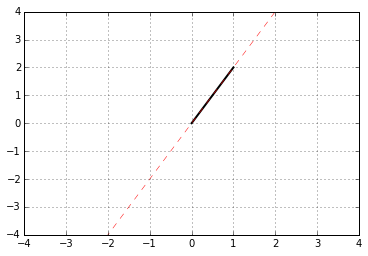

In [221]:
fig, ax = plt.subplots()
ax.plot([0, 1], [0, 2], linestyle='-', color='k', linewidth=2)
ax.set_xlim([-4, 4])
ax.set_ylim([-4, 4])

# We could also extend the line out using a little algebra and solving for y.
# Probably overkill here, but will do it in red.

y_formula = '2 * x_1'
x_1 = np.arange(-10, 10)
y_1 = eval(y_formula)

ax.plot(x_1, y_1, linestyle='--', color='r', linewidth=.5)
ax.grid('on')

Let's take the second equation, $-x + 2y = 3$. It doesn't go through the origin.

If $x = -3$, then $y = 0$. Or if $x = -1$ then $y = 2$

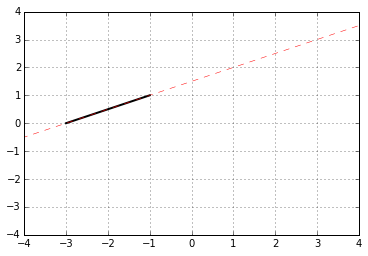

In [225]:
# Solve for x this time for presentation purposes
y_formula = '(3 + x_2) / 2'
x_2 = np.arange(-10, 10)
y_2 = eval(y_formula)

fig, ax = plt.subplots()
ax.plot([-3, -1], [0, 1], linestyle='-', color='k', linewidth=2)
ax.plot(x_2, y_2, linestyle='--', color='r', linewidth=.5)
ax.set(xlim=[-4, 4], ylim=[-4,4])
ax.grid('on')

Now, if we plot both of those lines at the same time, the point at which they intersect will solve this system of equations.

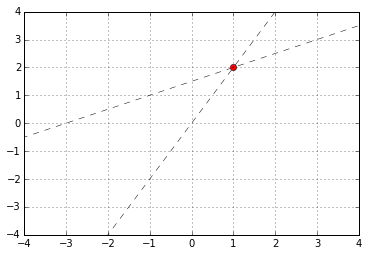

In [226]:
fig, ax = plt.subplots()
ax.plot(x_1, y_1, linestyle='--', color='k', linewidth=.5)
ax.plot(x_2, y_2, linestyle='--', color='k', linewidth=.5)
ax.plot(1, 2, 'o', color='r')
ax.set_xlim([-4, 4])
ax.set_ylim([-4, 4])
ax.grid('on')

The lines intersect at (1, 2), meaning:

<center>
    $\pmb{x} = \begin{bmatrix}
                    1 \\
                    2
               \end{bmatrix}$
</center>

Moving on to the "column picture." We'll now examine the columns of the matrix.

<center>
$\pmb{x} \begin{bmatrix} 2 \\ -1 \end{bmatrix} 
    + \pmb{y} \begin{bmatrix} -1 \\ 2 \end{bmatrix}
    = \begin{bmatrix} 0 \\ 3 \end{bmatrix}$
</center>

So now we're looking for the $x$ and $y$ that tells us how to combine these two vectors to produce the vector $\pmb{b} = [0, 3]$.

This is called a *linear combination*, and it's fundamental operation to linear algebra. 

Plotting these vectors (each of which have two components so we can plot them in two dimensions).

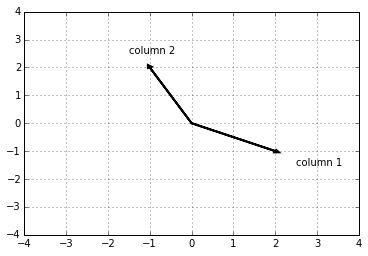

In [227]:
# Solve for x this time for presentation purposes
fig, ax = plt.subplots()
ax.arrow(0, 0, 2, -1, head_width=0.1, head_length=0.1, linewidth=2)
ax.arrow(0, 0, -1, 2, head_width=0.1, head_length=0.1, linewidth=2)
ax.annotate('column 1', xy=(2, -1), xytext=(2.5, -1.5))
ax.annotate('column 2', xy=(-1, 2), xytext=(-1.5, 2.5))
ax.set(xlim=[-4, 4], ylim=[-4,4])
ax.grid('on')

The correct linear combination of these two vectors is the one that produces [0, 3].

We already know from above that the correct solution is (1, 2), but let's plot it to see it. This means we'll take 1 of column 1 and 2 of column 2. We'll plot column 1, then add 2 column 2s onto the end of that vector. 

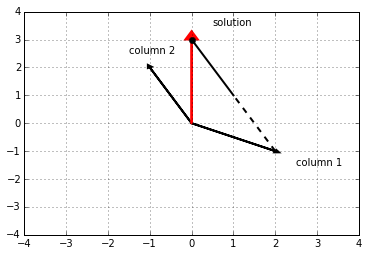

In [228]:
fig, ax = plt.subplots()
ax.arrow(0, 0, 2, -1, head_width=0.1, head_length=0.1, linewidth=2)
ax.arrow(0, 0, -1, 2, head_width=0.1, head_length=0.1, linewidth=2)
ax.arrow(0, 0, 0, 3, head_width=0.3, head_length=0.3, linewidth=2, color='r')
ax.plot([2, 1], [-1, 1], linestyle='--', color='k', linewidth=2)
ax.plot([1, 0], [1, 3], color='k', linewidth=2)
ax.plot(0, 3, 'o', color='k')
ax.annotate('column 1', xy=(2, -1), xytext=(2.5, -1.5))
ax.annotate('column 2', xy=(-1, 2), xytext=(-1.5, 2.5))
ax.annotate('solution', xy=(0, 3), xytext=(.5, 3.5))
ax.set(xlim=[-4, 4], ylim=[-4,4])
ax.grid('on')

What are **all** the combinations that we could use and what are **all** the results we would get? In fact, we could get any right hand side (**b**) at all. There are all possible achievable **b**s.

Moving on to 3 equations, 3 unknowns. Now working in three-dimensional space.

\begin{array}{rrrrcl}
    2x & - & y   &   &    & = & 0 \\
    -x & + & 2y  & - & z  & = & 1 \\
       &   & -3y & + & 4z & = & 4
\end{array}

Moving onto matrix form, using NumPy arrays.

In [229]:
A = np.array([[2, -1, 0],
              [-1, 2, -1],
              [0, -3, 4]])

b = np.array([[0],
              [-1],
              [4]])

print(A)
print(b)

[[ 2 -1  0]
 [-1  2 -1]
 [ 0 -3  4]]
[[ 0]
 [-1]
 [ 4]]


All the points that solve an equation are a plane, not a line. Three dimensions and above are difficult to plot, so now we start to see the importance of matrices.

Each row in a 3x3 system of equations produces a plane. Two of those planes meet in a line. All three of those planes meet in a point, and since it's a 3-D space, a point has three components.

The row picture was easy with two equations. It's more difficult with three, and gets harder from there on out. No longer will we use the row picture to solve these things. Examining the column picture, we have:

#### <center> $\pmb{x} \begin{bmatrix} 2 \\ -1 \\ 0 \end{bmatrix}      + \pmb{y} \begin{bmatrix} -1 \\ 2 \\ -3 \end{bmatrix}     + \pmb{z} \begin{bmatrix} 0 \\ -1 \\ 4 \end{bmatrix}     = \begin{bmatrix} 0 \\ -1 \\ 4 \end{bmatrix}$ </center>

Need to find a linear combination of the left hand side columns to produce the RHS. Strang draws these in three dimensions, but I'm not going to, since we'll be moving past visual representations anyway.

And there's a problem -- one of the columns (column 3) is the same as the RHS. So we know we just want 1 of column 3 and no column 1 or column 2. 

<center>
$\pmb{b} = \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}$
</center>


Next lecture, we'll discuss elimination, which is how to solve in all cases, no matter the number of dimensions. This is what most numerical software uses to solve systems of equations as well.

What if the RHS looked like this?

<center>
$\pmb{x} \begin{bmatrix} 2 \\ -1 \\ 0 \end{bmatrix} 
    + \pmb{y} \begin{bmatrix} -1 \\ 2 \\ -3 \end{bmatrix}
    + \pmb{z} \begin{bmatrix} 0 \\ -1 \\ 4 \end{bmatrix}
    = \begin{bmatrix} 1 \\ 1 \\ -3 \end{bmatrix}$
</center>

Now the RHS is just the sum of columns 1 and 2, so the solution is $\pmb{b} = [1, 1, 0]$.

The question then becomes, can you solve these equations for **any** RHS?

Alternatively, can you solve $\pmb{Ax} = \pmb{b}$ for every $\pmb{b}$? Is there a solution for every $\pmb{b}$? If so, elimination will give a way to find it.

Do the linear combinations of the columns fill the entire three-dimensional space?

When you multiply a matrix ($\pmb{A}$) by a vector ($\pmb{x}$), you get a combination of the columns, the vector $\pmb{b}$. Taking linear combinations of the columns to find b. 

For this 3x3 matrix $\pmb{A}$, the answer is yes, you can find a solution for every $\pmb{b}$. 

This matrix is a "good" matrix, aka a **non-singular** matrix, an **invertible** matrix. What would make this not the case?

If all three columns lie in the same plane, their combinations will lie on the same plane. This is a problem. For instance, if column 3 is just the sum of column 1 and column 2. This would mean the matrix would be **non-invertible** or **singular**.

What if it was a 9x9 matrix? (Nine equations with nine unknowns). Each column would be a vector in nine-dimensional space and would be looking at linear combinations to find the RHS. We need to know if we can always do this in any given case.

If the columns are chosen randomly, it would be non-singular and invertible. But if you chose the columns to be non-independent (aka dependent), then the matrix would be singular and non-invertible.

## Matrix Form

$\pmb{Ax} = \pmb{b}$ is a multiplication problem. So how do you multiply a matrix by a vector?

Two ways to do it. The first way is a column at a time (this is Strang's preferred method).

In [12]:
A = np.array(([2, 5],
              [1, 3]))

x = np.array([1, 2])

This is saying to take 1 of column 1 and 2 of column 2 and add them together.

In [213]:
b = 1 * A[:, 0] + 2 * A[:, 1]
b

array([12,  7])

Could also do it a row at a time -- this is a **dot product**. This is multiplying the rows of $\pmb{A}$ by the column $\pmb{x}$ to produce $\pmb{b}$. It's iterative and tedious to do by hand.

Luckily NumPy has a method for this that you can call directly on array objects.

In [14]:
A.dot(x)

array([12,  7])

We can also do this in SymPy by just multiplying the two matrices together.

In [17]:
A_sym = sym.Matrix(A)
x_sym = sym.Matrix(x)
A_sym * x_sym

Matrix([
[12.0],
[ 7.0]])